In [1]:
import pytest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/nishi/Desktop/diabetes.csv',header = 0)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data[['Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
data.fillna(data.mean(), inplace = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


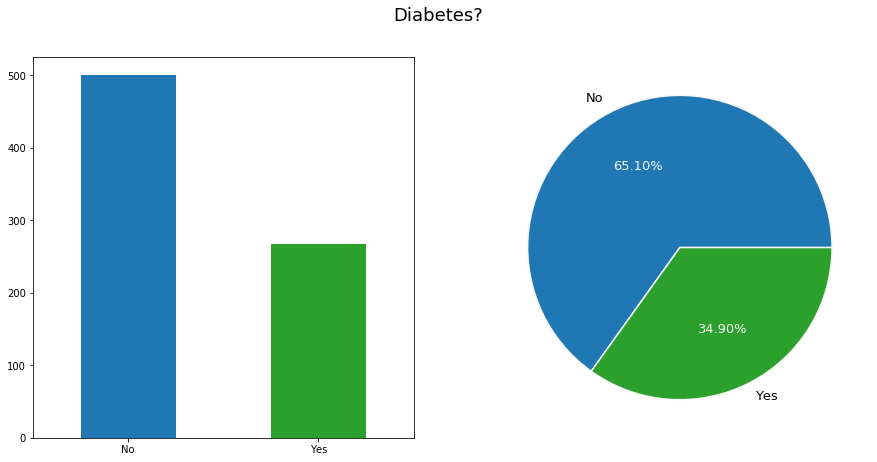

In [7]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.
color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct =
"%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

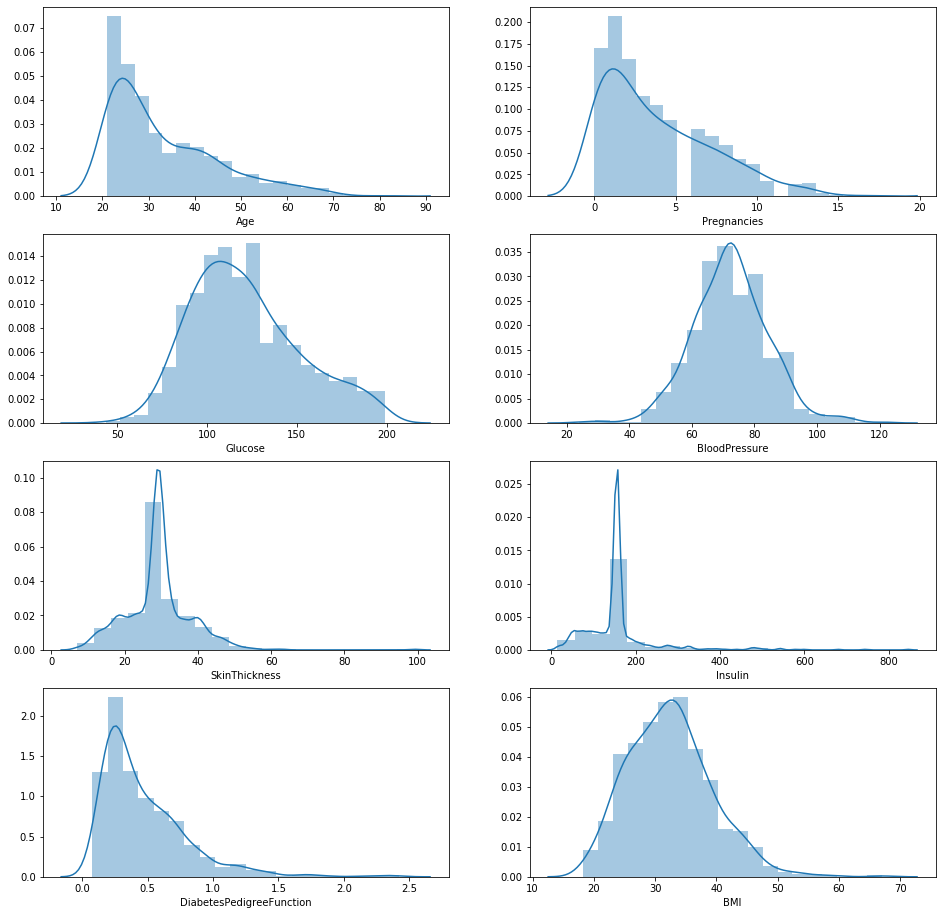

In [8]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0])
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(data.BMI, bins = 20, ax=ax[3,1])

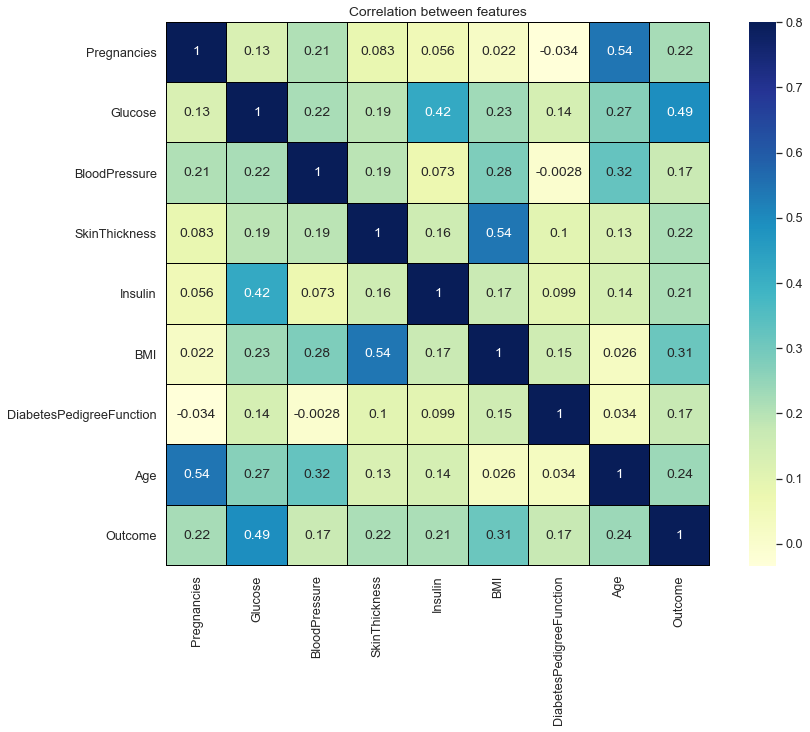

In [9]:
corr=data.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [11]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


Accuracy on Train Set  100.0
Accuracy on Test Set 77.60416666666666


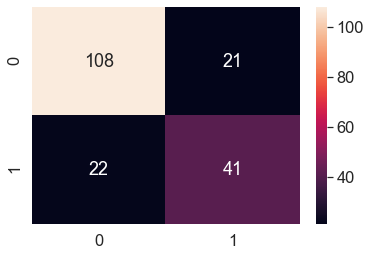

In [12]:
#Model
DT = DecisionTreeClassifier()#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy on Train Set ", DT.score(X_train, y_train)*100)
print("Accuracy on Test Set", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [13]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\nishi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


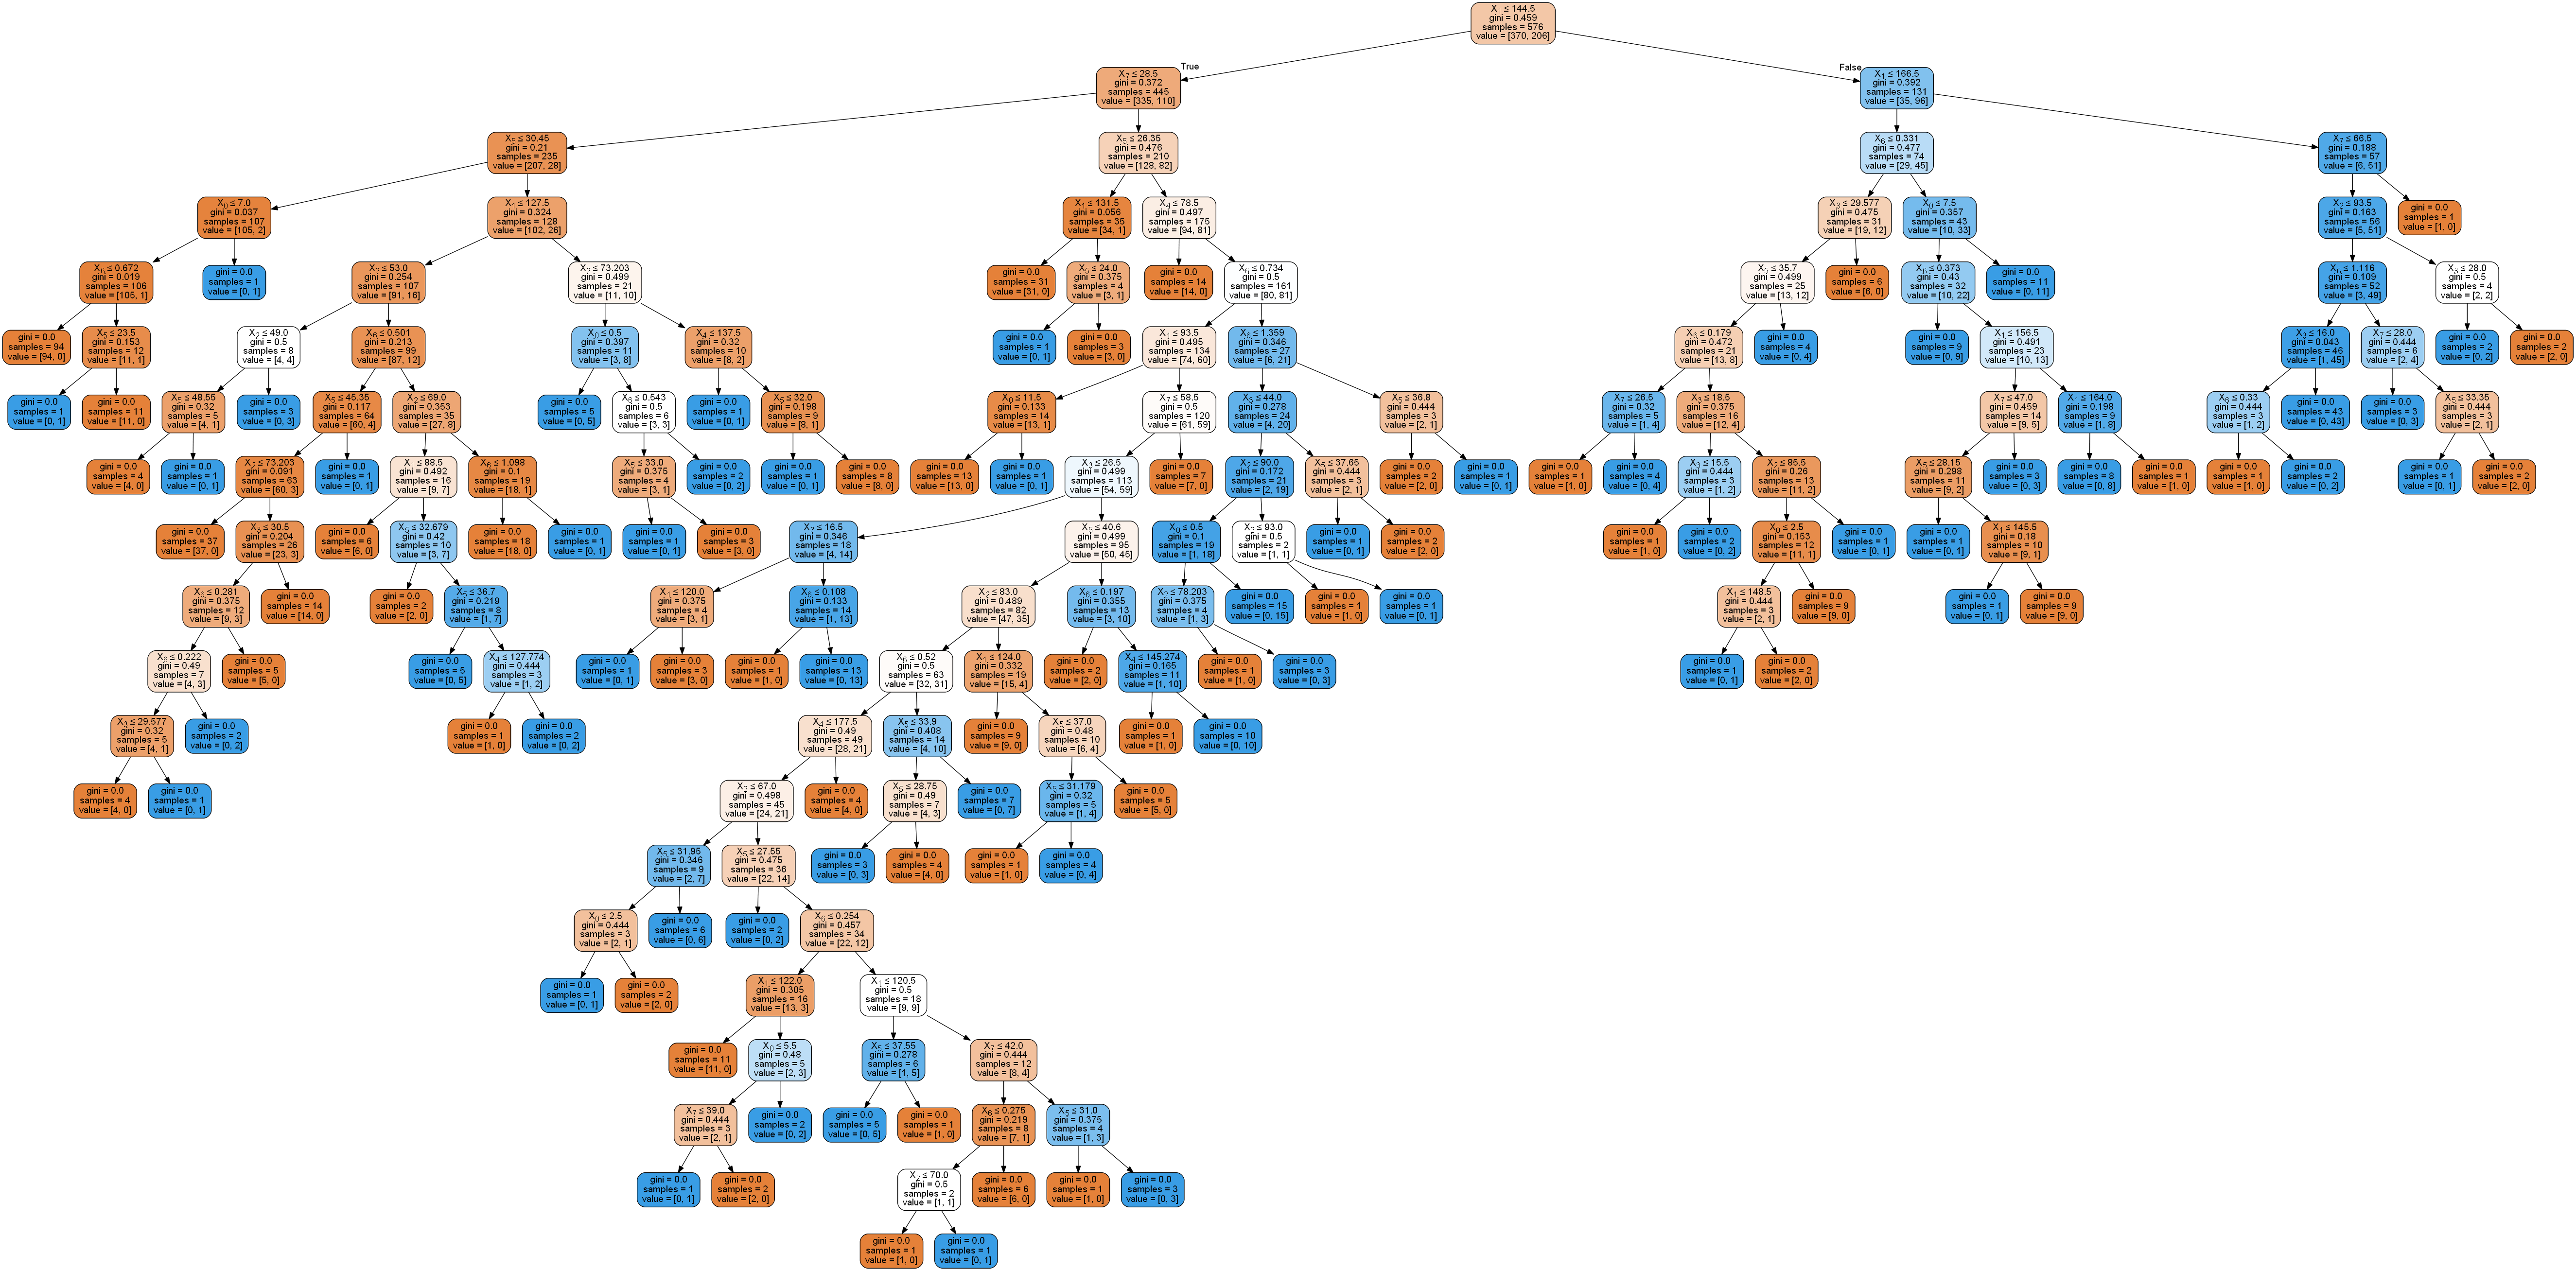

In [14]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Accuracy on Train Set  75.0
Accuracy on Test Set 77.08333333333334


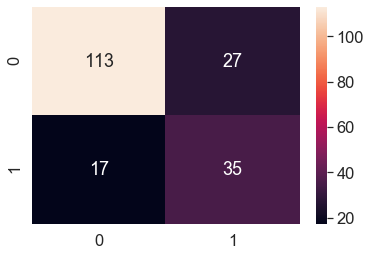

In [15]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(X_train,y_train)
y_pred = nbclf.predict(X_test)
#Accuracy
print("Accuracy on Train Set ", nbclf.score(X_train, y_train)*100)
print("Accuracy on Test Set", nbclf.score(X_test,y_test)*100)
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [16]:
import keras
from keras.utils import np_utils

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
# Convert labels to One Hot Encoded
num_digits = 2
y_train = np_utils.to_categorical(y_train, num_digits)
y_test = np_utils.to_categorical(y_test, num_digits)

In [19]:
y_train=pd.DataFrame.from_records(y_train)
y_test=pd.DataFrame.from_records(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(500, input_dim=8, activation='sigmoid'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=25, batch_size=70)

Epoch 1/25
9/9 [==============================] - 11s 2ms/step - loss: 0.3092 - accuracy: 0.5979
Epoch 2/25
9/9 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.6106
Epoch 3/25
9/9 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.6550
Epoch 4/25
9/9 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.7077
Epoch 5/25
9/9 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.6806
Epoch 6/25
9/9 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.7110
Epoch 7/25
9/9 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.7141
Epoch 8/25
9/9 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.7186
Epoch 9/25
9/9 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.7014
Epoch 10/25
9/9 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.7384
Epoch 11/25
9/9 [=====================

In [21]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.125%
[0.1604403555393219, 0.765625]
accuracy: 76.562%


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=0)#Model
model = GradientBoostingClassifier()
#fiting the model
model.fit(X_train, y_train)
#prediction
y_pred = model.predict(X_test)
#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

Accuracy  78.64583333333334
